# CSV to DataFrame

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [3]:
df1994 = pd.read_csv('./data/seoul 1994-01-01 to 1996-01-01.csv')
df1996 = pd.read_csv('./data/seoul 1996-01-01 to 1998-01-01.csv')[1:]
df1998 = pd.read_csv('./data/seoul 1998-01-01 to 2000-01-01.csv')[1:]
df2000 = pd.read_csv('./data/seoul 2000-01-01 to 2002-01-01.csv')[1:]
df2002 = pd.read_csv('./data/seoul 2002-01-01 to 2004-01-01.csv')[1:]
df2004 = pd.read_csv('./data/seoul 2004-01-01 to 2006-01-01.csv')[1:]
df2006 = pd.read_csv('./data/seoul 2006-01-01 to 2008-01-01.csv')[1:]
df2008 = pd.read_csv('./data/seoul 2008-01-01 to 2010-01-01.csv')[1:]
df2010 = pd.read_csv('./data/seoul 2010-01-01 to 2012-01-01.csv')[1:]
df2012 = pd.read_csv('./data/seoul 2012-01-01 to 2014-01-01.csv')[1:]
df2014 = pd.read_csv('./data/seoul 2014-01-01 to 2016-01-01.csv')[1:]
df2016 = pd.read_csv('./data/seoul 2016-01-01 to 2018-01-01.csv')[1:]
df2018 = pd.read_csv('./data/seoul 2018-01-01 to 2020-01-01.csv')[1:]
df2020 = pd.read_csv('./data/seoul 2020-01-01 to 2022-01-01.csv')[1:]
df2022 = pd.read_csv('./data/seoul 2022-01-01 to 2024-01-01.csv')[1:]
df = pd.concat([df1994, df1996, df1998, df2000, df2002, df2004, df2006, df2008, df2010, df2012, df2014, df2016, df2018, df2020, df2022])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10958 entries, 0 to 730
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10958 non-null  object 
 1   datetime          10958 non-null  object 
 2   tempmax           10958 non-null  float64
 3   tempmin           10958 non-null  float64
 4   temp              10958 non-null  float64
 5   feelslikemax      10958 non-null  float64
 6   feelslikemin      10958 non-null  float64
 7   feelslike         10958 non-null  float64
 8   dew               10958 non-null  float64
 9   humidity          10958 non-null  float64
 10  precip            10958 non-null  float64
 11  precipprob        10958 non-null  int64  
 12  precipcover       10958 non-null  float64
 13  preciptype        4045 non-null   object 
 14  snow              8035 non-null   float64
 15  snowdepth         8242 non-null   float64
 16  windgust          3642 non-null   float64
 17  

> 각 파일별로 yyyy-01-01 일자가 중복된다. 이에 첫번째 데이터는 슬라이싱 처리한다.

In [4]:
# df.info()
df = df[['datetime','temp']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10958 entries, 0 to 730
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  10958 non-null  object 
 1   temp      10958 non-null  float64
dtypes: float64(1), object(1)
memory usage: 256.8+ KB


In [5]:
import dateutil.parser as dp

# 실제 1994-01-01 ~ 2024-01-01 까지의 일수 계산
first_day = dp.parse('1994-01-01')
last_day = dp.parse('2024-01-02')

diff_days = last_day - first_day

# 데이터셋의 개수와 일수 비교 확인
df['datetime'].count(), diff_days

(10958, datetime.timedelta(days=10958))

**diff_days**

Date 계산시 day1 - day2를 하는 경우 day2의 하루전 까지의 기간을 계산 합니다.
 
따라서 day2를 2024-01-02로 지정 합니다.

# 결측치 분석

In [7]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data_summary.round(2)

,Missing Values,Percentage
datetime,0,0.0
temp,0,0.0


In [8]:
# 화씨를 섭씨로 변환하는 함수
#     Args:
#     temp_fahrenheit (float): 화씨 온도
#     Returns:
#     float: 섭씨 온도
def fahrenheit_to_celsius(temp_fahrenheit):
    return (temp_fahrenheit - 32) * 5.0 / 9.0

In [11]:
# 1994-01-01 ~ 2019-12-31 까지는 화씨 데이터
# 2022-01-01 ~ 2024-01-01 까지는 이미 섭씨 데이터 확인

before_2022 = df[df['datetime'] <= '2022-01-01'].copy()
after_2022 = df[df['datetime'] > '2022-01-01'].copy()

before_2022['temp_celsius'] =  before_2022['temp'].apply(fahrenheit_to_celsius).round(1)
# before_2022.head()

after_2022['temp_celsius'] = after_2022['temp']
# after_2022.head()
df = pd.concat([before_2022, after_2022])
df.to_csv('./data/seoul summary.csv', index=False)
df.head()


,datetime,temp,temp_celsius
0,1994-01-01,26.3,-3.2
1,1994-01-02,36.2,2.3
2,1994-01-03,38.0,3.3
3,1994-01-04,30.1,-1.1
4,1994-01-05,33.1,0.6


In [12]:
df[df['datetime'] >= '2021-12-31'].head(20)

,datetime,temp,temp_celsius
730,2021-12-31,20.5,-6.4
731,2022-01-01,23.5,-4.7
1,2022-01-02,-1.1,-1.1
2,2022-01-03,-2.4,-2.4
3,2022-01-04,-1.9,-1.9
4,2022-01-05,-3.1,-3.1
5,2022-01-06,-1.9,-1.9
6,2022-01-07,-1.7,-1.7
7,2022-01-08,-0.2,-0.2
8,2022-01-09,1.7,1.7


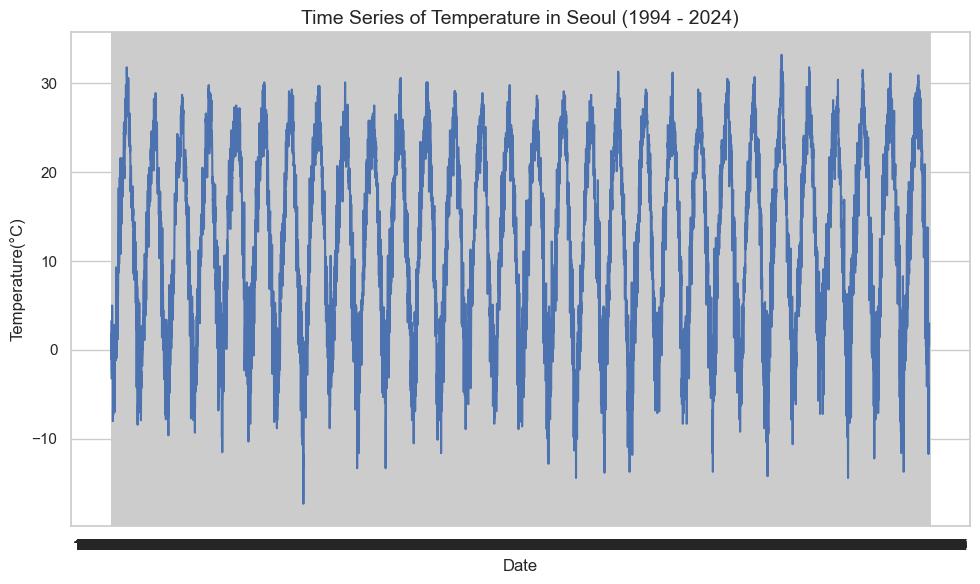

In [13]:
datetime_with_celsius = df[['datetime', 'temp_celsius']]

# seaborn style 세팅
sns.set_theme(style="whitegrid")

# lineplot 생성
plt.figure(figsize=(10, 6))
sns.lineplot(x='datetime', y='temp_celsius', data=datetime_with_celsius)

# 타이틀, 라벨 세팅
plt.title('Time Series of Temperature in Seoul (1994 - 2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature(°C)', fontsize=12)

# 결과 확인 및 저장
plt.tight_layout()
# plt.show()
plt.savefig('./figures/seoul_temperature_1994-2024.png')


In [9]:
df[df['tempmin_celsius'] == df['tempmin_celsius'].min()][['datetime','temp_celsius','tempmin_celsius','tempmax_celsius']]


,datetime,temp_celsius,tempmin_celsius,tempmax_celsius
380,2001-01-15,-17.3,-22.5,-13.3


In [10]:
df[df['tempmax_celsius'] == df['tempmax_celsius'].max()][['datetime','temp_celsius','tempmin_celsius','tempmax_celsius']]

,datetime,temp_celsius,tempmin_celsius,tempmax_celsius
212,2018-08-01,32.8,26.9,39.1


# 봄, 여름, 가을, 겨울 구분 함수 만들기
---
- 봄: 일평균기온이 5℃ 이상 올라간 후 다시 떨어지지 않는 첫날 부터
- 여름: 일평균기온이 20℃ 이상 올라간 후 다시 떨어지지 않는 첫날 부터
- 가을: 일평균기온이 20℃ 미만으로 떨어진 후 다시 올라가지 않는 첫날 부터
- 겨울: 일평균기온이 5℃ 미만으로 떨어진 후 다시 올라가지 않는 첫날 부터

출처: https://kscc.re.kr/2020kscc/papers/Oral/A-03.pdf

In [18]:
def determine_season(temperatures):
    seasons = []
    current_season = 'Winter'
    seasons.append(current_season)  # 첫 번째 날짜는 Winter로 시작
    
    for i in range(1, len(temperatures)):
        future_temps = temperatures[i:i+14]  # 현재 일자 기준으로 2주간의 온도 데이터를 확인
        
        # 14일 보다 적게 남은 경우 기존 계절값을 넣는다.
        if i+14 > len(temperatures):
            seasons.append(current_season)
            continue
        
        if current_season == 'Winter':
            # 2주간의 온도중 10일 이상 5도 이상이라면 Spring으로 전환
            if sum(temp >= 5 for temp in future_temps) >= 10:
                current_season = 'Spring'
        
        elif current_season == 'Spring':
            # 2주간의 온도중 10일 이상 20도 이상이라면 Summer로 전환
            if sum(temp >= 20 for temp in future_temps) >= 10:
                current_season = 'Summer'
        
        elif current_season == 'Summer':
            # 2주간의 온도중 10일 이상 20도 미만으로 떨어지면 Fall로 전환
            if sum(temp < 20 for temp in future_temps) >= 10:
                current_season = 'Fall'
        
        elif current_season == 'Fall':
            # 2주간의 온도중 10일 이상 5도 미만으로 떨어지면 Winter로 전환
            if sum(temp < 5 for temp in future_temps) >= 10:
                current_season = 'Winter'
        
        seasons.append(current_season)
    
    return seasons

In [19]:
df['seasons'] = determine_season(df['temp_celsius'].tolist())
df.to_csv('./data/seoul summary.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10958 entries, 0 to 730
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      10958 non-null  object 
 1   temp          10958 non-null  float64
 2   temp_celsius  10958 non-null  float64
 3   seasons       10958 non-null  object 
dtypes: float64(2), object(2)
memory usage: 428.0+ KB


# 연도별 계절 카운팅

In [20]:
# 새로운 DF 선언
year_season_count = pd.DataFrame()

# datetime을 date type으로 변경 후 year 추출
year_season_count['year'] = pd.to_datetime(df['datetime']).dt.year
year_season_count['season'] = df['seasons']

# 년도별로 계절을 카운트
year_season_count.groupby(['year', 'season']).size().unstack(fill_value=0).reindex(columns=['Spring', 'Summer', 'Fall', 'Winter'])

season,Spring,Summer,Fall,Winter
year,,,,
1994,67,103,83,112
1995,83,95,72,115
1996,60,123,49,134
1997,97,99,79,90
1998,109,125,38,93
1999,76,123,58,108
2000,74,114,69,109
2001,64,129,63,109
2002,85,105,46,129


<Figure size 1200x800 with 0 Axes>

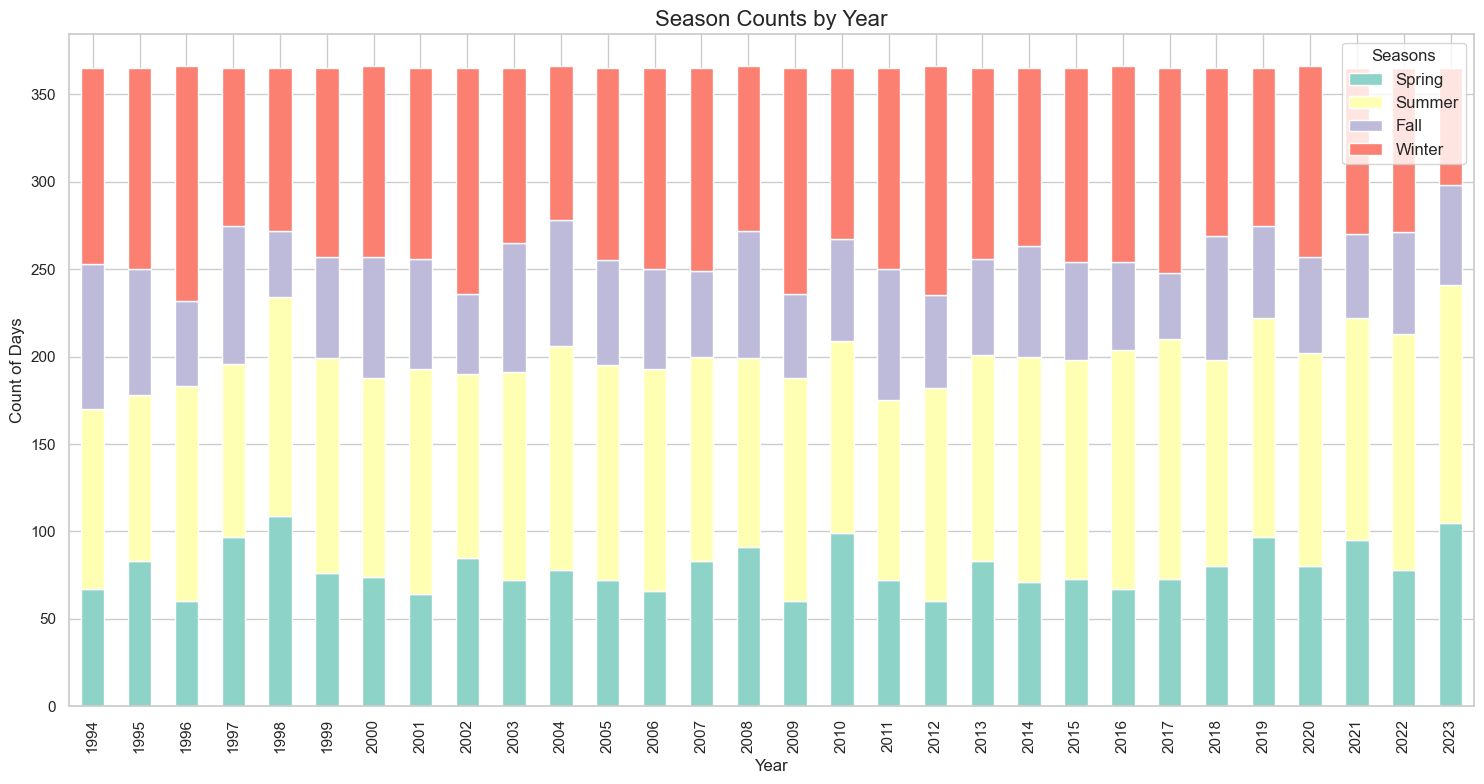

In [21]:
# 데이터 준비
year_season_count_plot = (
    year_season_count[:len(year_season_count)-1]
    .groupby(['year', 'season'])
    .size()
    .unstack(fill_value=0)
).reindex(columns=['Spring', 'Summer', 'Fall', 'Winter'])

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 막대 그래프 생성 (stacked bar chart)
year_season_count_plot.plot(kind='bar', stacked=True, figsize=(15, 8), color=sns.color_palette("Set3"))

# 그래프 제목과 축 레이블 설정
plt.title('Season Counts by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Days', fontsize=12)

# 범례 설정
plt.legend(title='Seasons', fontsize=12)

# 그래프 출력
plt.tight_layout()
# plt.show()
plt.savefig('./figures/seoul_year_season_count.png')

# 연도별 계절 퍼센트 확인

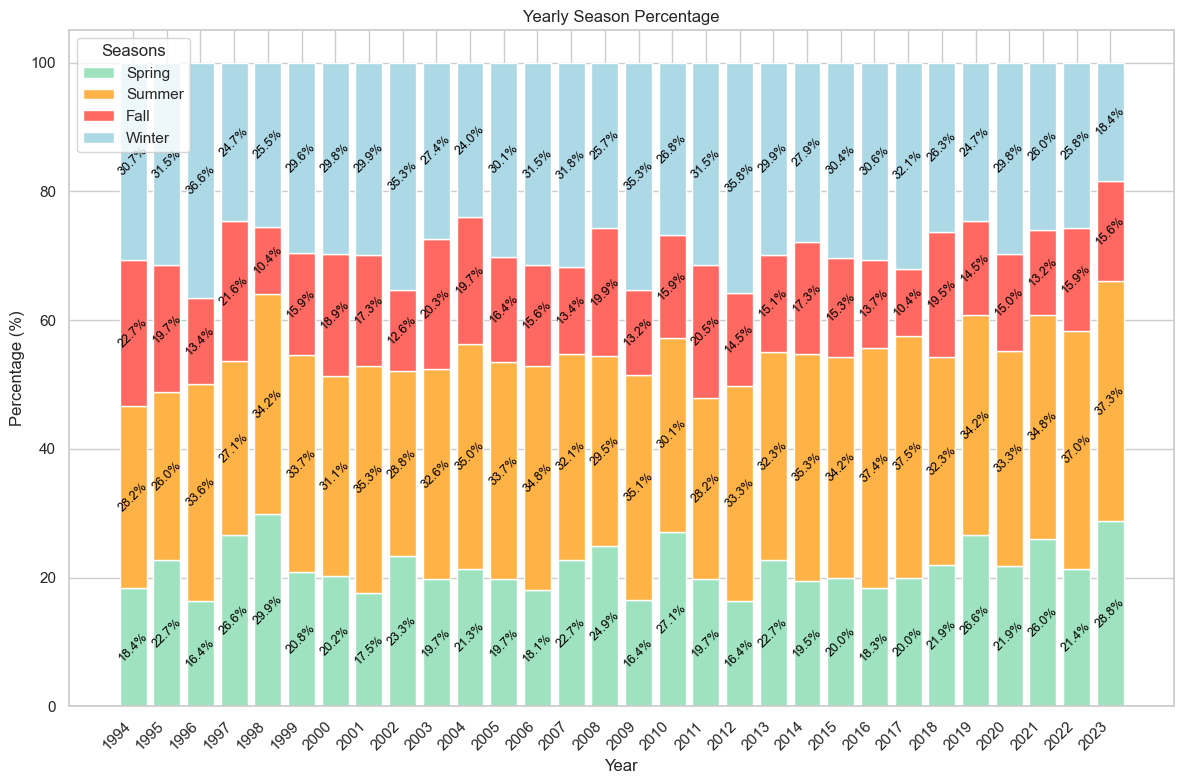

In [22]:
# 계절 순서 설정
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# 각 연도에 대해 계절의 일수 퍼센트 계산
year_season_percentage = (year_season_count[:len(year_season_count)-1]
                          .groupby(['year', 'season'])
                          .size()
                          .unstack(fill_value=0))
year_season_percentage = (year_season_percentage
                          .div(year_season_percentage.sum(axis=1), axis=0) * 100)

# 계절 순서 재정렬
year_season_percentage = year_season_percentage[season_order]

# 막대그래프 그리기 (stacked bar plot)
fig, ax = plt.subplots(figsize=(12, 8))

# 각 계절별로 누적 막대그래프 그리기
bottom = None
colors = {'Spring': '#9FE2BF', 'Summer': '#FFB347', 'Fall': '#FF6961', 'Winter': '#ADD8E6'}

for season in season_order:
    # 누적 막대그래프
    bars = ax.bar(year_season_percentage.index, year_season_percentage[season], bottom=bottom, color=colors[season], label=season)
    
    # 각 막대 위에 퍼센트 표시
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_y() + height / 2, 
            f'{height:.1f}%', 
            ha='center', va='center', fontsize=9, color='black', rotation=45
        )
    
    if bottom is None:
        bottom = year_season_percentage[season]
    else:
        bottom += year_season_percentage[season]

# x축, y축 설정 및 제목
ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)')
ax.set_title('Yearly Season Percentage')
ax.legend(title="Seasons")

# 모든 연도를 x축에 표시
ax.set_xticks(year_season_percentage.index)
ax.set_xticklabels(year_season_percentage.index, rotation=45, ha='right')

plt.tight_layout()
plt.savefig('./figures/seoul_year_season_percentage.png')
# plt.show()

# 계절별 일수 변화

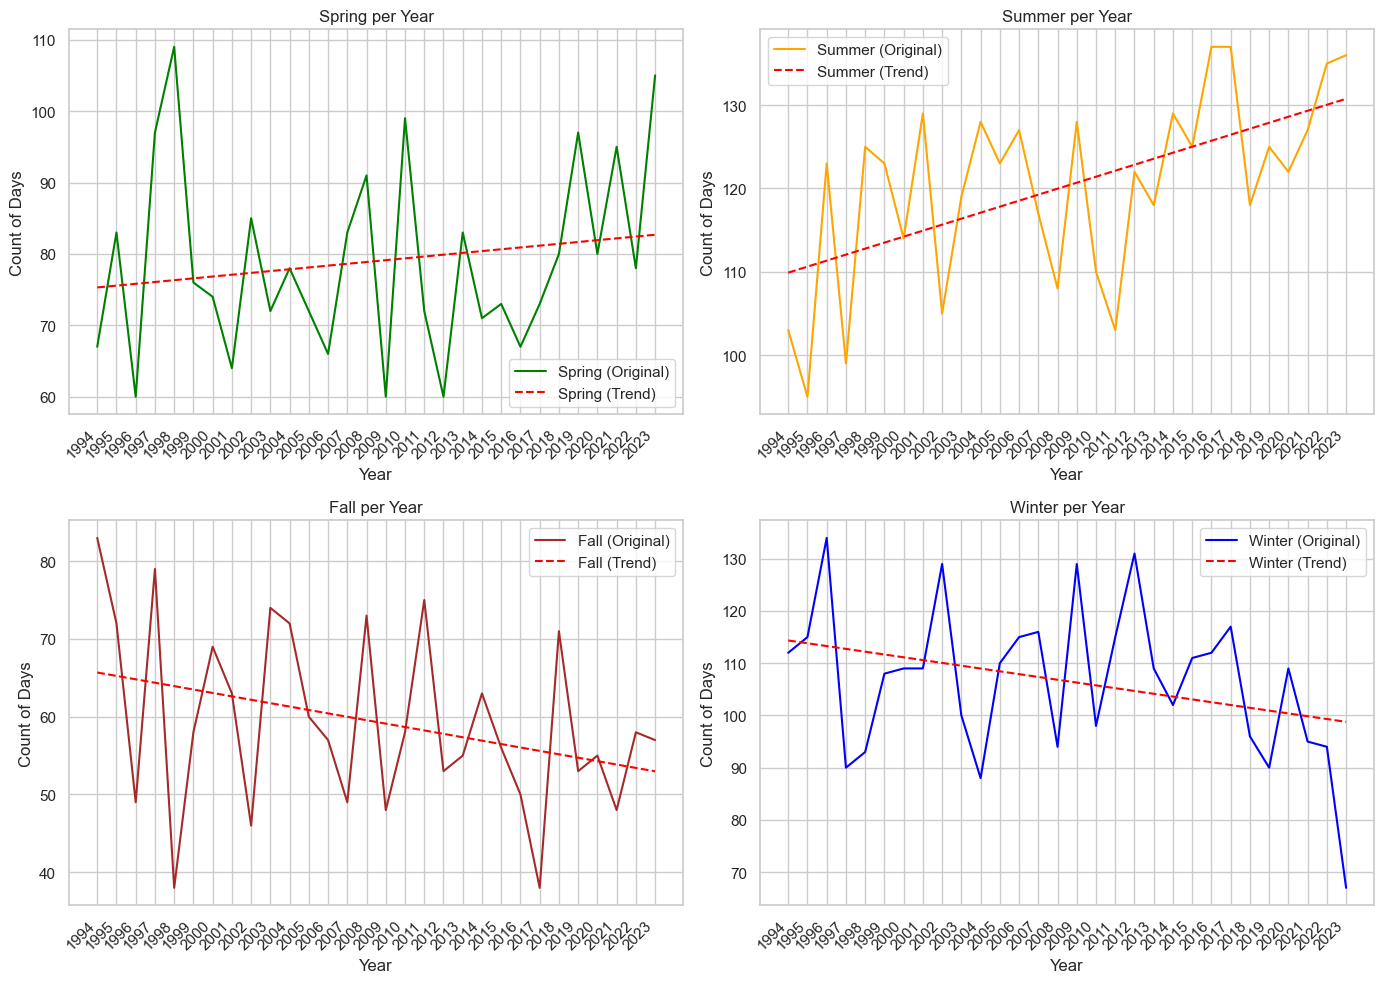

In [23]:
# 원하는 순서대로 계절 정렬
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
year_season_count_reordered = year_season_count[:len(year_season_count)-1].groupby(['year', 'season']).size().unstack(fill_value=0)[season_order]

# 서브플롯 설정 (2x2 그리드)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 계절별 색상 설정
colors = {'Spring': 'green', 'Summer': 'orange', 'Fall': 'brown', 'Winter': 'blue'}

# 계절별 그래프 그리기
for i, season in enumerate(season_order):
    row = i // 2
    col = i % 2
    
    # 연도 및 해당 계절의 데이터
    years = year_season_count_reordered.index
    season_data = year_season_count_reordered[season]
    
    # 원본 데이터 꺾은선 그래프
    axes[row, col].plot(years, season_data, label=f'{season} (Original)', color=colors[season])
    
    # 추세선 계산 (선형 회귀)
    z = np.polyfit(years, season_data, 1)
    p = np.poly1d(z)
    axes[row, col].plot(years, p(years), label=f'{season} (Trend)', linestyle='--', color='red')
    
    # x축에 모든 연도 표시
    axes[row, col].set_xticks(years)
    axes[row, col].set_xticklabels(years, rotation=45, ha='right')  # 연도를 기울여서 표시
    
    # 그래프 설정
    axes[row, col].set_title(f'{season} per Year')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Count of Days')
    axes[row, col].grid(True)
    axes[row, col].legend()

plt.tight_layout()
# plt.show()
plt.savefig('./figures/seoul_year_season_order.png')

# 계절별 처음 시작된 일자 확인

In [24]:
# datetime을 기준으로 각 연도의 계절별 시작일과 종료일 구하기
first_season_start_date_df = pd.read_csv('./data/seoul summary.csv')
first_season_start_date_df['datetime'] = pd.to_datetime(first_season_start_date_df['datetime'])
first_season_start_date_df['year'] = first_season_start_date_df['datetime'].dt.year

# 각 계절의 시작일을 구함
season_start_dates = first_season_start_date_df.groupby(['year', 'seasons'])['datetime'].min().unstack()

# 각 계절의 종료일을 구함 (Winter 시작을 구하기 위해 Fall의 종료일 필요)
season_end_dates = first_season_start_date_df.groupby(['year', 'seasons'])['datetime'].max().unstack()

# Fall의 마지막 날의 다음 날을 Winter 시작일로 설정
season_start_dates['Winter'] = season_end_dates['Fall'] + pd.Timedelta(days=1)

# 필요한 열 (Spring, Summer, Fall, Winter)의 순서로 재정렬
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_start_dates = season_start_dates[:len(season_start_dates)-1][season_order]

# 결과 출력
season_start_dates

seasons,Spring,Summer,Fall,Winter
year,,,,
1994,1994-03-24,1994-05-30,1994-09-10,1994-12-02
1995,1995-03-12,1995-06-03,1995-09-06,1995-11-17
1996,1996-03-25,1996-05-24,1996-09-24,1996-11-12
1997,1997-02-25,1997-06-02,1997-09-09,1997-11-27
1998,1998-02-16,1998-06-05,1998-10-08,1998-11-15
1999,1999-03-12,1999-05-27,1999-09-27,1999-11-24
2000,2000-03-09,2000-05-22,2000-09-13,2000-11-21
2001,2001-03-12,2001-05-15,2001-09-21,2001-11-23
2002,2002-03-05,2002-05-29,2002-09-11,2002-10-27


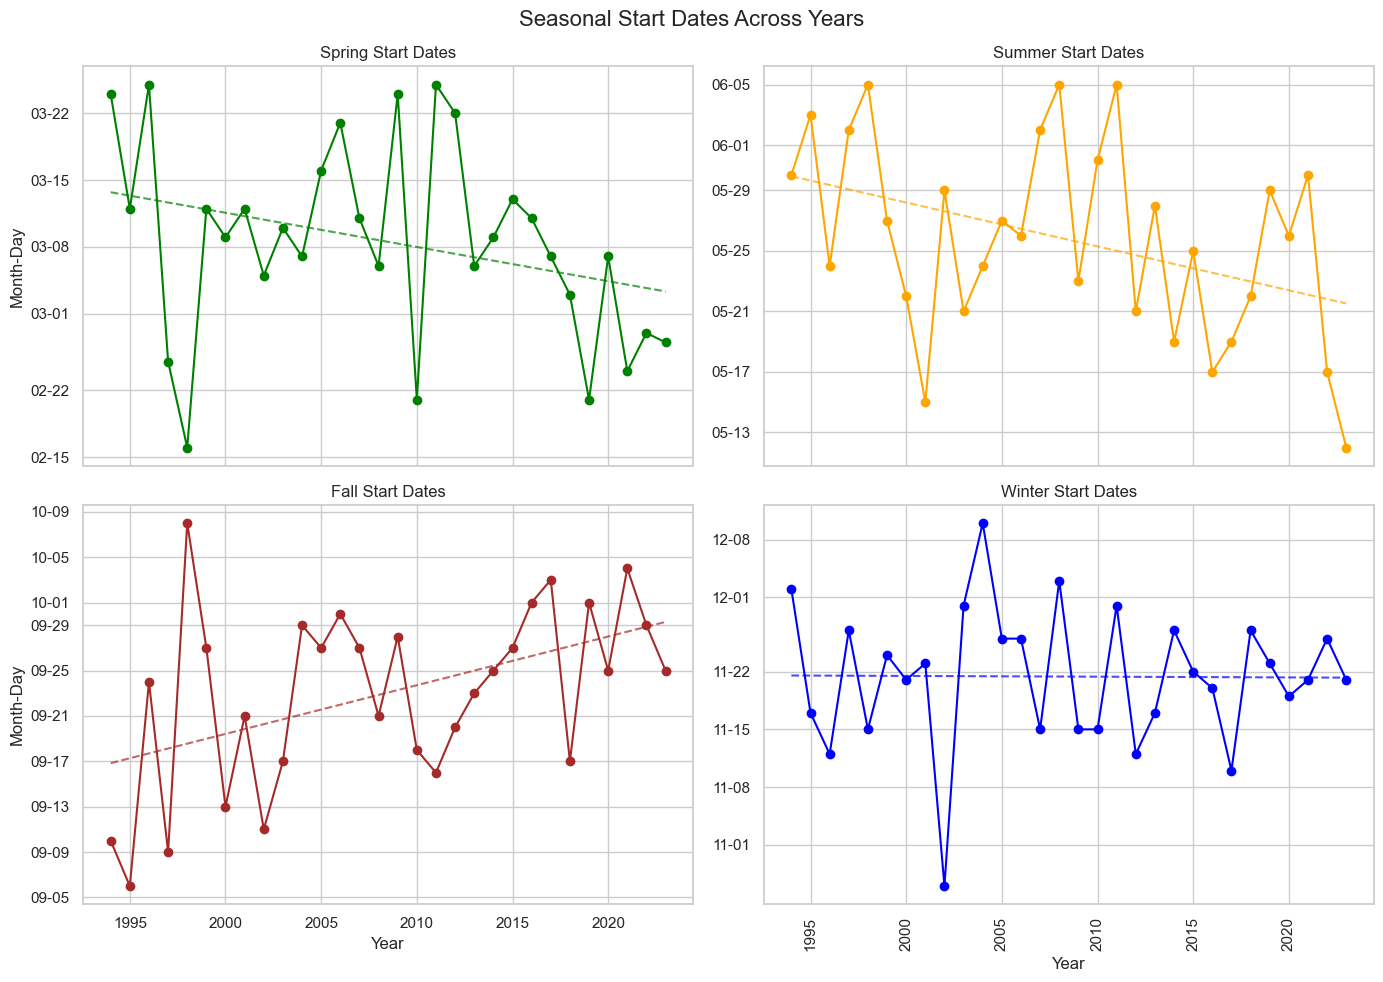

In [25]:
# 각 계절의 시작일을 담은 DataFrame 예시 (season_start_dates)
# Spring, Summer, Fall, Winter 시작일을 각각 가져온 후
season_start_dates['Spring'] = pd.to_datetime(season_start_dates['Spring'])
season_start_dates['Summer'] = pd.to_datetime(season_start_dates['Summer'])
season_start_dates['Fall'] = pd.to_datetime(season_start_dates['Fall'])
season_start_dates['Winter'] = pd.to_datetime(season_start_dates['Winter'])

# 월-일 정보만 추출 (년도 정보 제거)
season_start_dates['Spring'] = season_start_dates['Spring'].apply(lambda x: x.replace(year=2000))
season_start_dates['Summer'] = season_start_dates['Summer'].apply(lambda x: x.replace(year=2000))
season_start_dates['Fall'] = season_start_dates['Fall'].apply(lambda x: x.replace(year=2000))
season_start_dates['Winter'] = season_start_dates['Winter'].apply(lambda x: x.replace(year=2000))

# 그래프 생성
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# 날짜 형식으로 y축을 표현할 수 있게 변환
years = season_start_dates.index

# 함수: 추세선 추가
def add_trendline(ax, x, y, color):
    numeric_years = np.arange(len(x))  # 연도를 숫자 인덱스로 변환
    trend = np.polyfit(numeric_years, y.astype('int64'), 1)  # 추세선 계산 (1차원 회귀)
    trendline = np.polyval(trend, numeric_years)  # 추세선 값을 생성
    ax.plot(x, pd.to_datetime(trendline), linestyle='--', color=color, alpha=0.7)

# Spring
axs[0, 0].plot(years, season_start_dates['Spring'], marker='o', color='green')
add_trendline(axs[0, 0], years, season_start_dates['Spring'], 'green')
axs[0, 0].set_title('Spring Start Dates')
axs[0, 0].set_ylabel('Month-Day')
axs[0, 0].yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Summer
axs[0, 1].plot(years, season_start_dates['Summer'], marker='o', color='orange')
add_trendline(axs[0, 1], years, season_start_dates['Summer'], 'orange')
axs[0, 1].set_title('Summer Start Dates')
axs[0, 1].yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Fall
axs[1, 0].plot(years, season_start_dates['Fall'], marker='o', color='brown')
add_trendline(axs[1, 0], years, season_start_dates['Fall'], 'brown')
axs[1, 0].set_title('Fall Start Dates')
axs[1, 0].set_ylabel('Month-Day')
axs[1, 0].set_xlabel('Year')
axs[1, 0].yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Winter
axs[1, 1].plot(years, season_start_dates['Winter'], marker='o', color='blue')
add_trendline(axs[1, 1], years, season_start_dates['Winter'], 'blue')
axs[1, 1].set_title('Winter Start Dates')
axs[1, 1].set_xlabel('Year')
axs[1, 1].yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# x축을 연도로 설정
plt.xticks(rotation=90)

# 그래프 전체 제목 추가
plt.suptitle('Seasonal Start Dates Across Years', fontsize=16)

plt.tight_layout()
plt.savefig('./figures/seoul_season_start_trendline.png')
plt.show()

# 온도의 따른 일수 변화 확인
> 봄, 가을은 섭씨 5 ~ 20℃ 사이의 온도를 의미한다.
> 
> 따라서, 연도별 5~20℃ 사이의 일수 변화를 알아보자.

In [26]:
spring_fall_df = pd.read_csv('./data/seoul summary.csv')

# datetime을 pandas의 datetime 형식으로 변환
spring_fall_df['datetime'] = pd.to_datetime(spring_fall_df['datetime'])

# 온도가 5도 이상 20도 이하인 데이터를 필터링
condition = (spring_fall_df['temp_celsius'] >= 5) & (spring_fall_df['temp_celsius'] <= 20)
filtered_df = spring_fall_df[condition]

# 연도별로 그룹화하여 5도에서 20도 사이의 일수를 계산
days_range = filtered_df.groupby(filtered_df['datetime'].dt.year).size()
days_range

datetime
1994    155
1995    154
1996    126
1997    171
1998    144
1999    148
2000    144
2001    122
2002    149
2003    149
2004    154
2005    132
2006    138
2007    142
2008    151
2009    135
2010    139
2011    149
2012    124
2013    124
2014    139
2015    140
2016    131
2017    125
2018    139
2019    140
2020    156
2021    158
2022    146
2023    138
dtype: int64

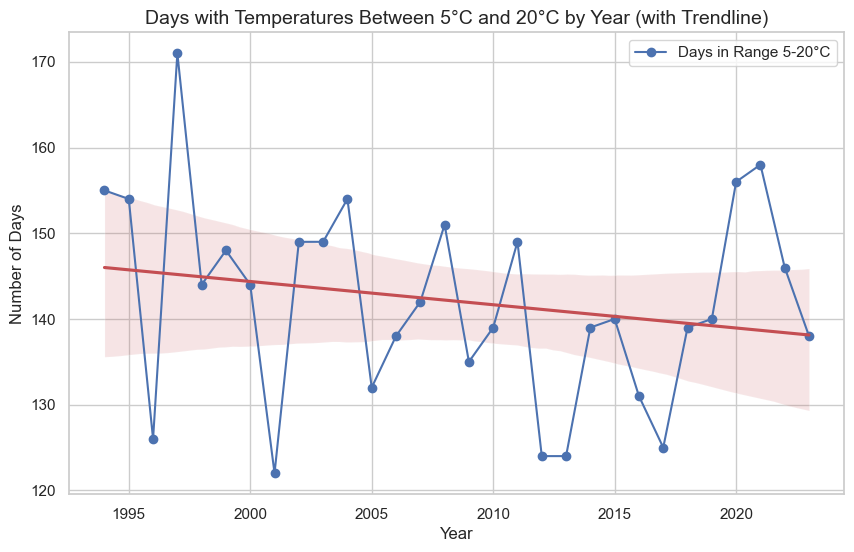

In [27]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 꺾은선 그래프 그리기
plt.plot(days_range.index, days_range.values, marker='o', color='b', label='Days in Range 5-20°C')

# 선형 회귀선 추가 (추세선)
sns.regplot(x=days_range.index, y=days_range.values, scatter=False, color='r', line_kws={"label":"Trendline"})

# 그래프 제목과 축 레이블 설정
plt.title('Days with Temperatures Between 5°C and 20°C by Year (with Trendline)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Days', fontsize=12)

# 범례 추가
plt.legend()

# 그래프 출력
plt.grid(True)
plt.savefig('./figures/seoul_spring_fall_days.png')
plt.show()

# 연도별 평균온도 변화

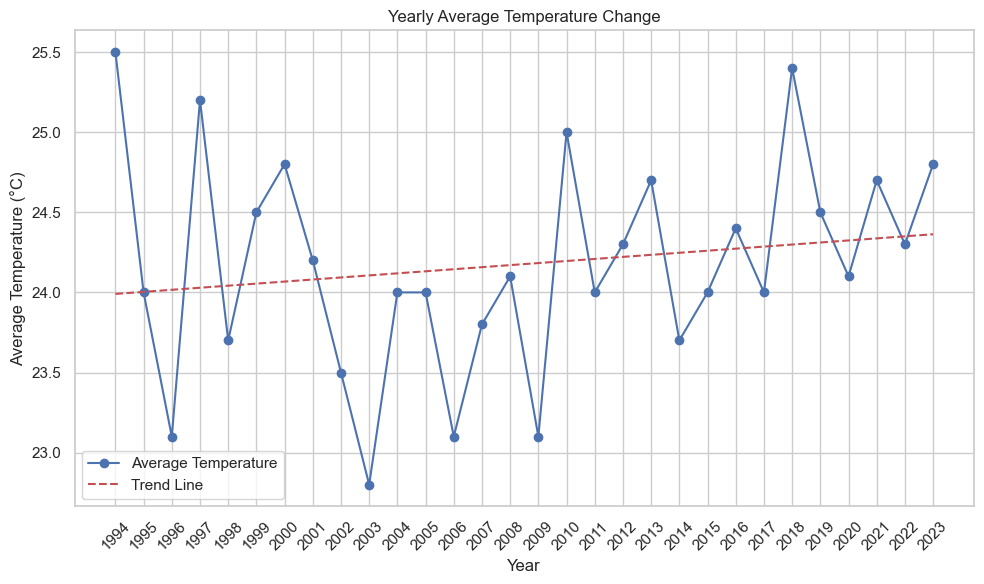

In [37]:
# 'datetime' 열을 날짜 형식으로 변환하고 'year' 열을 추가
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year

# 연도별로 일평균 온도의 평균을 계산
yearly_avg_temp = df[df['seasons'] == 'Summer'][:len(df)-1].groupby('year')['temp_celsius'].mean().round(1)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, marker='o', linestyle='-', label='Average Temperature')
plt.title('Yearly Average Temperature Change')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)

# 모든 연도를 x축에 표시
plt.xticks(yearly_avg_temp.index, rotation=45)

# 추세선 추가
z = np.polyfit(yearly_avg_temp.index, yearly_avg_temp.values, 1)
p = np.poly1d(z)
plt.plot(yearly_avg_temp.index, p(yearly_avg_temp.index), "r--", label='Trend Line')

# 범례 추가
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

# 2024년 날씨 데이터 Read

In [26]:
seoul2024_df = pd.read_csv('./data/seoul_2024.csv', encoding="cp949")
# seoul2024_df.head()
seoul2024_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   		지점번호      277 non-null    object 
 1   지점명         269 non-null    object 
 2   일시          269 non-null    object 
 3   평균기온(℃)     269 non-null    float64
 4   최고기온(℃)     269 non-null    float64
 5   	최고기온시각     269 non-null    object 
 6   최저기온(℃)     269 non-null    float64
 7   최저기온시각일교차   269 non-null    object 
 8   Unnamed: 8  269 non-null    float64
dtypes: float64(4), object(5)
memory usage: 19.6+ KB


In [31]:

seoul2024_df['seasons'] = determine_season(seoul2024_df['평균기온(℃)'])
seoul2024_df.info()
seoul2024_df[['일시','평균기온(℃)','seasons']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   		지점번호      277 non-null    object 
 1   지점명         269 non-null    object 
 2   일시          269 non-null    object 
 3   평균기온(℃)     269 non-null    float64
 4   최고기온(℃)     269 non-null    float64
 5   	최고기온시각     269 non-null    object 
 6   최저기온(℃)     269 non-null    float64
 7   최저기온시각일교차   269 non-null    object 
 8   Unnamed: 8  269 non-null    float64
 9   seasons     277 non-null    object 
dtypes: float64(4), object(6)
memory usage: 21.8+ KB


,일시,평균기온(℃),seasons
0,2024-01-01,3.3,Winter
1,2024-01-02,2.9,Winter
2,2024-01-03,1.8,Winter
3,2024-01-04,1.4,Winter
4,2024-01-05,5.0,Winter
...,...,...,...
272,NaN,NaN,Summer
273,NaN,NaN,Summer
274,NaN,NaN,Summer
275,NaN,NaN,Summer
